`March, 25 2022`

### **Generalization in KNN & Decision Tree Exercise**

#### **Use 'titanic' dataset from seaborn**

      - Features: 'pclass', 'sex', 'age', 'fare'
      - Target: 'survived'

**- Preprocess the data as needed.**<br>
**- Split the data into 70:30 proportion.**

#### **KNN**

- Scale the data.
- Find the optimum k factor in range of 1 to 150 and interpret the result in terms of underfitting and overfitting.
- Use accuracy score as the performance evaluation metric.


#### **Decision Tree**

- Analyze model performance regarding overfitting, underfitting, and sweetspot with these following hyperparameters:

            - minimum samples split in range of 2 to 150.
            - minimum samples leaf in range of 1 to 150.
            
- Explain what the hyperparameters do along with the interpretation of the result above!

<hr>

#### **Import Libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

#### **Load Dataset**

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df = df.dropna(subset=['age'])

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### **Define X and y**

In [5]:
X = df[['pclass', 'sex', 'age', 'fare']]
y = df['survived']

In [6]:
X.isna().sum()

pclass    0
sex       0
age       0
fare      0
dtype: int64

In [7]:
y.isna().sum()

0

In [8]:
X = pd.get_dummies(X, columns=['sex'], drop_first=True)
X

,pclass,age,fare,sex_male
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
885,3,39.0,29.1250,0
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
889,1,26.0,30.0000,1


#### **Model Complexity in KNN**

**Data splitting**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, 
    test_size = 0.2, 
    random_state = 42)

**Scaling**

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit, only apply to train set
X_train_scaled = scaler.transform(X_train) # transform data X_train
X_test_scaled = scaler.transform(X_test) # transform data x_test

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train) # model fit
y_predict_class = knn.predict(X_test_scaled) # model predict

In [12]:
print('Model accuracy in the test dataset:', accuracy_score(y_test, y_predict_class))

Model accuracy in the test dataset: 0.7972027972027972


In [13]:
# Find the best k.
k = range(1, 150, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)

    y_predict_train = knn.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_predict_train))

    y_predict_test = knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

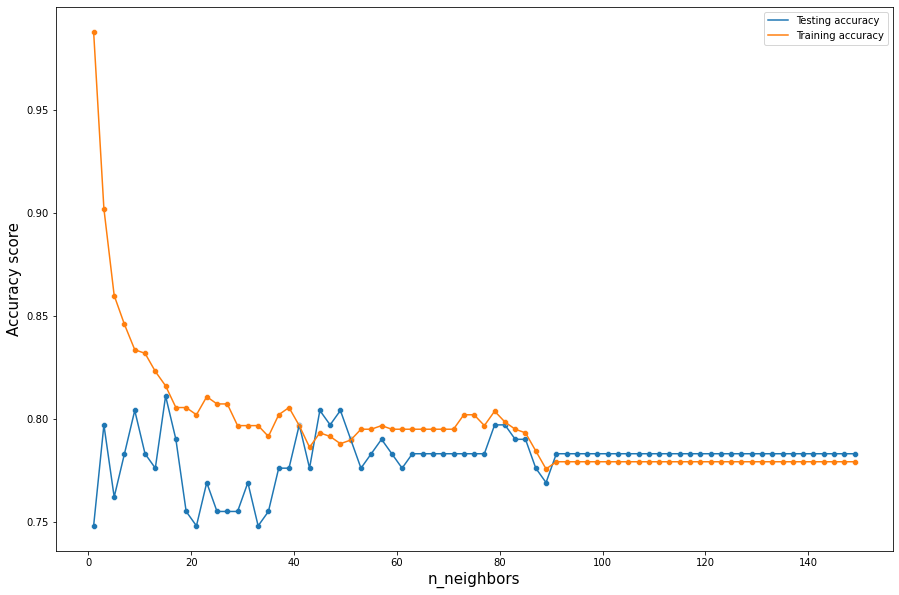

In [15]:
# Plot the accuracies result.
plt.figure(figsize=(15, 10))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['Testing accuracy', 'Training accuracy'])
plt.xlabel('n_neighbors', size=15)
plt.ylabel('Accuracy score', size=15);

In [16]:
# The best K with its score.
print('The best k =', best_k)
print('Test accuracy score =', score)

The best k = 15
Test accuracy score = 0.8111888111888111


**`Interpretation`**

- When k = 1, the training accuracy score is 100%. This perfect score is because the model estimates the probability only based on one sample, which is the nearest neighbor. Thus, the error in k = 1 would always be 0.

- k = 1 is very sensitive to any distortions, such as noise and outliers. Therefore, the accuracy score of the test set tends to be significantly below the training accuracy score. Increasing the number of k will reduce the effect of distortion (related to decision boundary).

- The best k is 15. The plot shows that the highest test score accuracy is obtained by the k of 15. For the ks greater than 15, the accuracy score tends to fluctuate with a decreasing trend, making it underfitting.

#### **Model Complexity in Decision Tree**

**Minimum samples split**

In [17]:
split = range(2, 150)
testing_accuracy = []
training_accuracy = []
score = 0

for i in split:
    tree = DecisionTreeClassifier(min_samples_split=i, criterion='entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        best_split = i
        score = acc_score

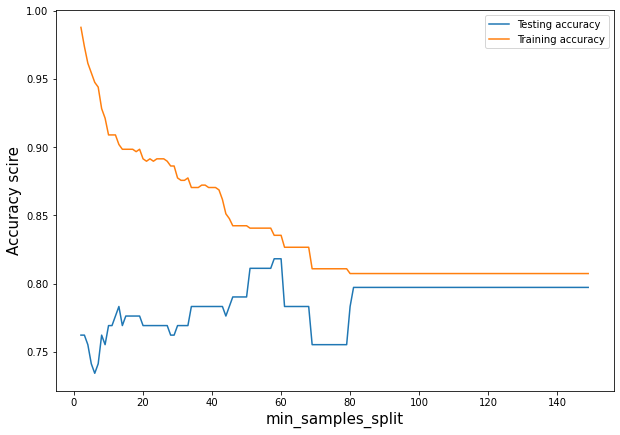

In [18]:
# Plot the result.
plt.figure(figsize=(10, 7))
sns.lineplot(split, testing_accuracy)
sns.lineplot(split, training_accuracy)
plt.legend(['Testing accuracy', 'Training accuracy'])
plt.xlabel('min_samples_split', size=15)
plt.ylabel('Accuracy scire', size=15);

In [20]:
print('The best minimum samples split =', best_split)
print('Test accuracy score =', score)

The best minimum samples split = 58
Test accuracy score = 0.8181818181818182


**`Interpretation`**

- Minimum samples split is the minimum sample number needed to create a new split in the internal node.

- For instance, if we define min_samples_split = 5, and there are 7 samples left in the internal node, then a new split can be done.

- For this case, the best min_samples_split is 58, which means we need a minimum of 58 samples to generate a new split in the internal node.

- Too low min_sample_split value causes a propensity of overrfitting menyebabkan kecenderungan terjadinya overfitting, and vice versa. Based on the figure, underfitting occurs when min_samples_split > 80.

**Minimum samples leaf**

In [21]:
leaf = range(1, 150)
testing_accuracy = []
training_accuracy = []
score = 0

for i in leaf:
    tree = DecisionTreeClassifier(min_samples_leaf=i, criterion='entropy')
    tree.fit(X_train, y_train)
    
    y_predict_train = tree.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))
    
    y_predict_test = tree.predict(X_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        best_leaf = i
        score = acc_score

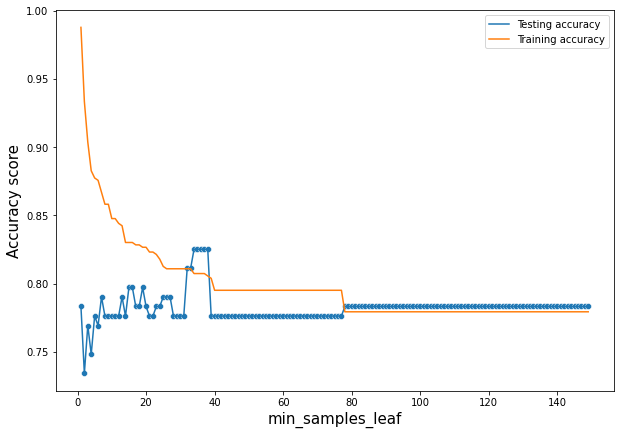

In [25]:
plt.figure(figsize=(10, 7))
sns.lineplot(leaf, testing_accuracy)
sns.scatterplot(leaf, testing_accuracy)
sns.lineplot(leaf, training_accuracy)
plt.legend(['Testing accuracy', 'Training accuracy'])
plt.xlabel('min_samples_leaf', size=15)
plt.ylabel('Accuracy score', size=15);

In [23]:
print('The best min_samples_leaf =', best_leaf)
print('Test score accuracy =', score)

The best min_samples_leaf = 34
Test score accuracy = 0.8251748251748252


**`Interpretation`**

- Minimum samples leaf is the minimum sample number needed to create a leaf.

- For instance, if the last split results in 2 node leaves, the first is 2 samples and the other is 6 samples. If we define the min_samples_leaf = 3, then a new split could not be done as one node only has 2 samples, even though the last internal nodes have 8 samples.

- Contrary to the respected code that only focuses on the highest test accuracy score, I prefer to choose 31 as the best min_samples_leaf as it is slightly better than the training accuracy.

- It means the minimum sample needed for a new splitting and creating a leaf is 31.

- The plot shows that overfitting occurs when min_samples_leaf < 30, whereas if min_samples_leaf > 40, there is generally no difference.

<hr>